 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_returns_csv)
whale_df.set_index(pd.to_datetime(whale_df['Date'], infer_datetime_format = True), inplace = True)
whale_df.drop(columns = ['Date'], inplace = True)
whale_df.sort_index(inplace = True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace = True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns_csv)
algo_df.set_index(pd.to_datetime(algo_df['Date'], infer_datetime_format = True), inplace = True)
algo_df.drop(columns = ['Date'], inplace = True)
algo_df.sort_index(inplace = True)
algo_df.tail()

,Algo 1,Algo 2
Date,,
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570
2019-05-01,0.000094,-0.007358


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna(inplace = True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_history_csv)
sp500_df.set_index(pd.to_datetime(sp500_df['Date'], infer_datetime_format = True), inplace = True)
sp500_df.drop(columns = ['Date'], inplace = True)
sp500_df.sort_index(inplace = True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$","")
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
sp500_returns = sp500_df.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
sp500_returns.dropna(inplace = True)
sp500_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
# Rename Column
sp500_returns.rename(columns = {"Close":"S&P 500"}, inplace = True)
sp500_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
combo_df = pd.concat([whale_df, algo_df, sp500_returns], axis = "columns", join = "inner")
combo_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

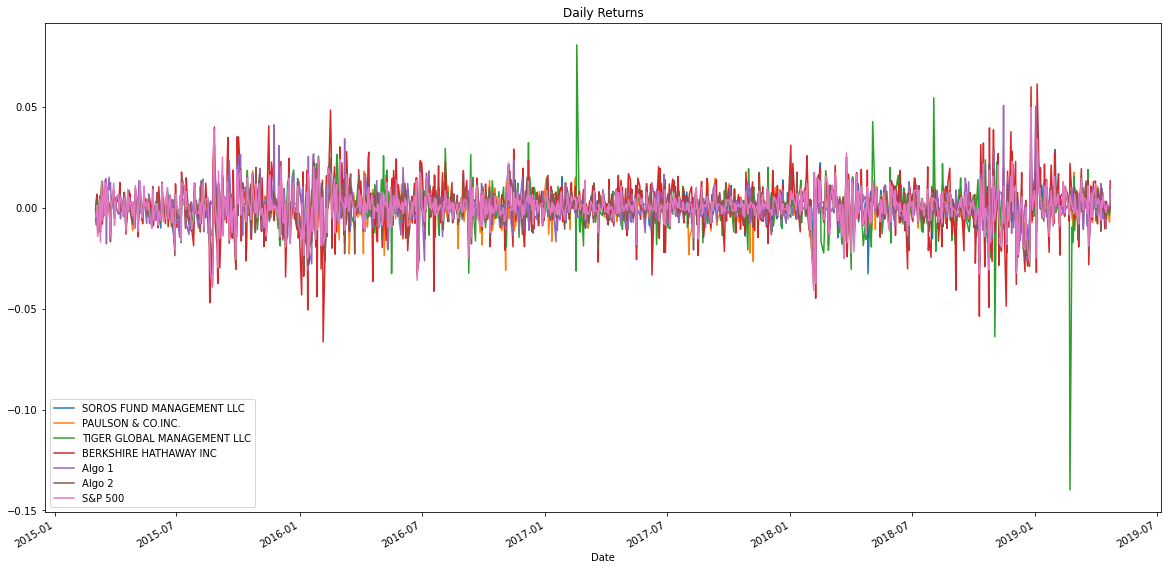

In [15]:
# Plot daily returns
combo_ax = combo_df.plot(figsize = (20,10), title = "Daily Returns")
combo_ax.legend(loc = "lower left")

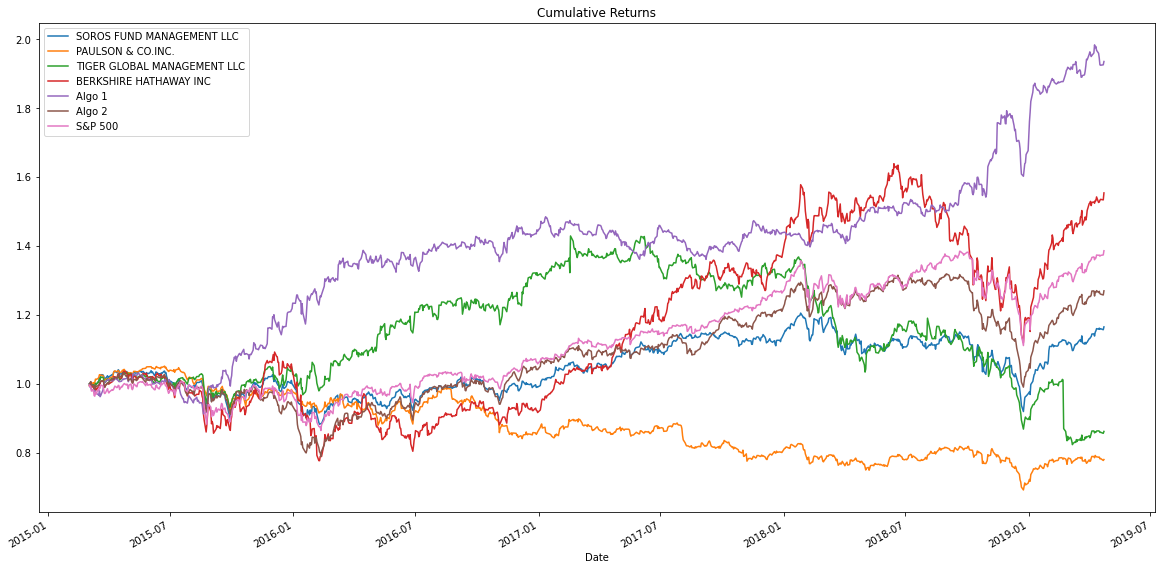

In [16]:
# Plot cumulative returns
combo_cumulative_returns = (1+combo_df).cumprod()
combo_cum_ax = combo_cumulative_returns.plot(figsize = (20,10), title = "Cumulative Returns")
combo_cum_ax.legend(loc = "upper left")

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

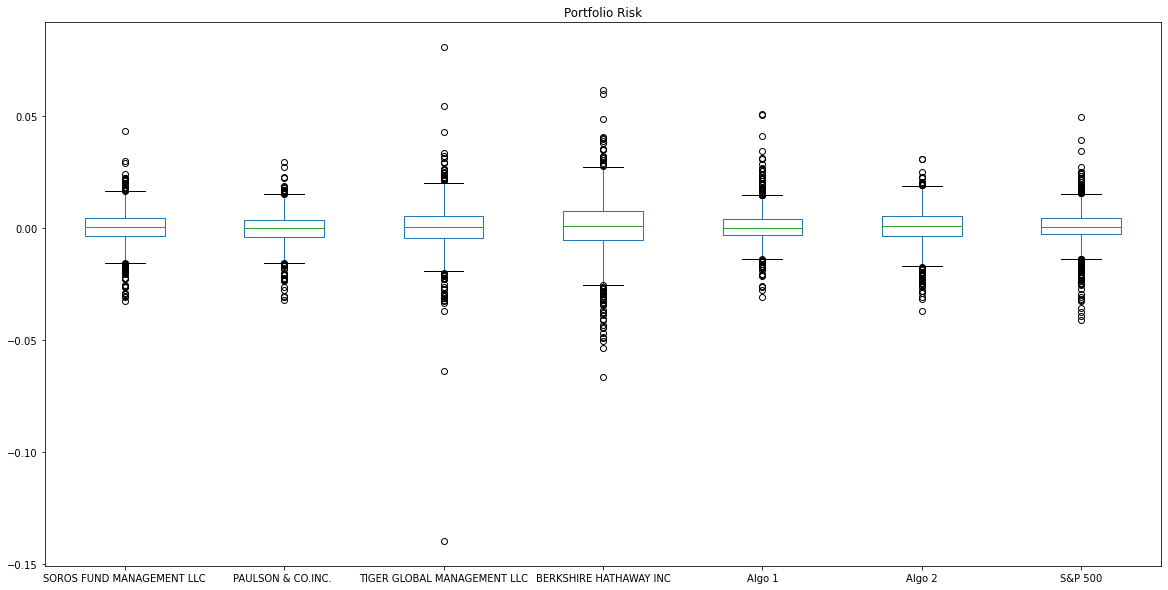

In [17]:
# Box plot to visually show risk
combo_box = combo_df.plot.box(figsize = (20,10), title = "Portfolio Risk")

In [18]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
combo_std = combo_df.std()
combo_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [19]:
# Determine which portfolios are riskier than the S&P 500
combo_std > combo_std["S&P 500"]

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [20]:
# Calculate the annualized standard deviation (252 trading days)
combo_std_yr = combo_std*np.sqrt(252)
combo_std_yr

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

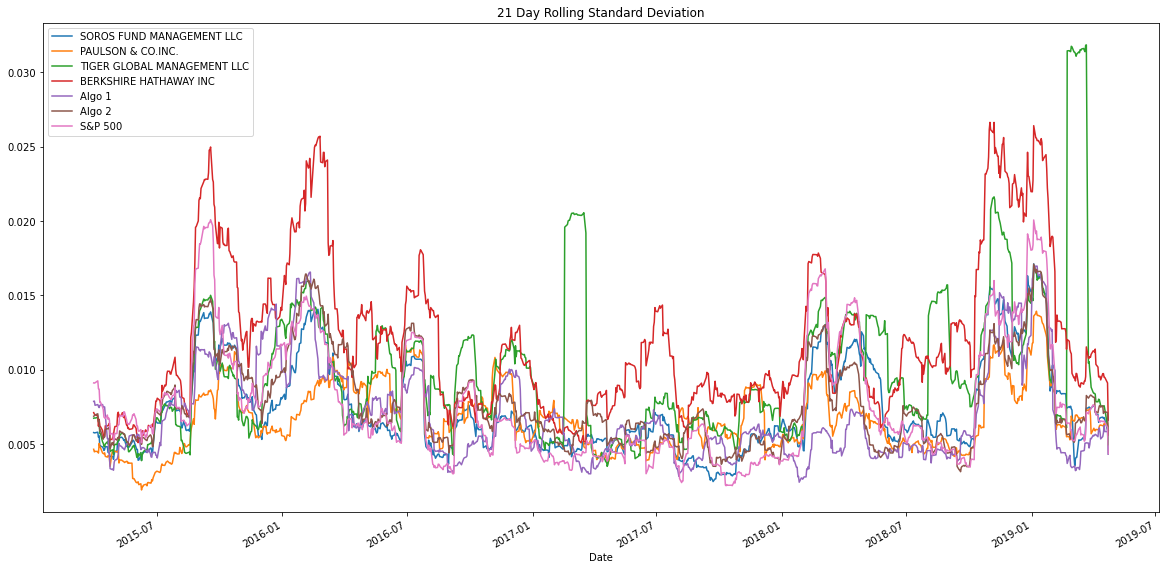

In [21]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
combo_rolling_std_ax = combo_df.rolling(window = 21).std().plot(figsize = (20,10), title = "21 Day Rolling Standard Deviation")
combo_rolling_std_ax.legend(loc = "upper left")

In [22]:
# Construct a correlation table
combo_corr = combo_df.corr()
combo_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


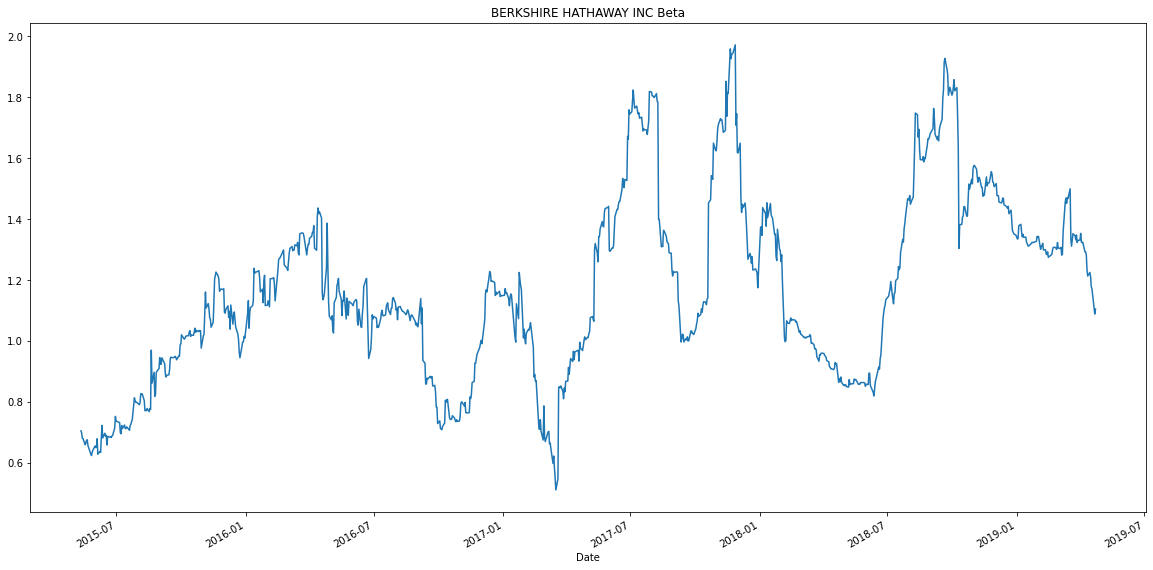

In [23]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
beta_portfolio = "BERKSHIRE HATHAWAY INC"
span = 50
covar = combo_df[beta_portfolio].rolling(window = span).cov(combo_df["S&P 500"])
var = combo_df["S&P 500"].rolling(window = span).var()
beta = covar/var
beta_title = beta_portfolio + " Beta"
beta_ax = beta.plot(figsize = (20,10), title = beta_title)

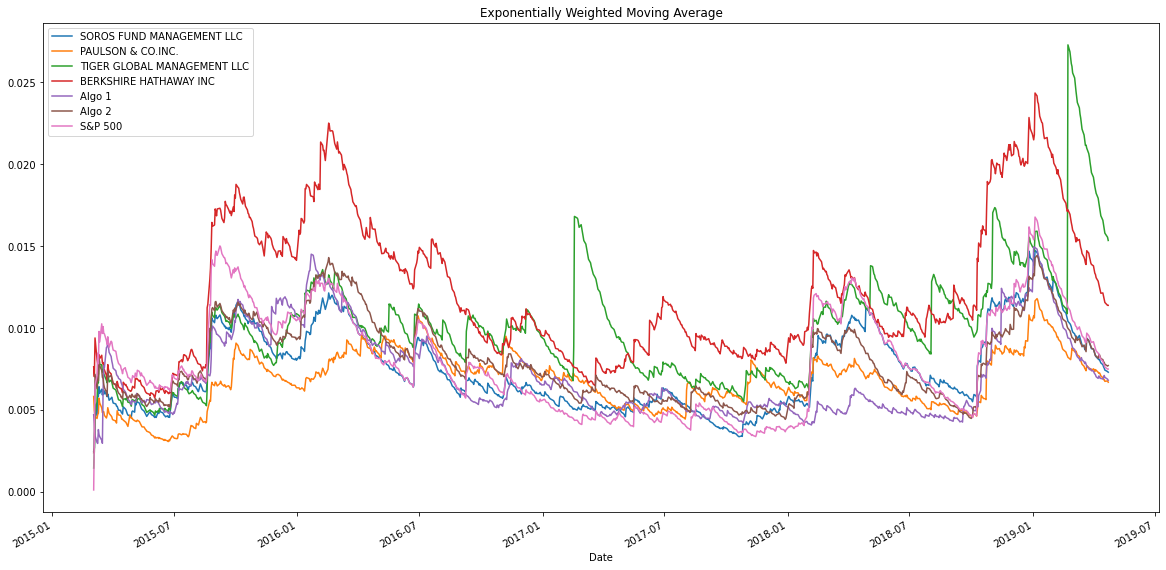

In [24]:
# Calculate a rolling window using the exponentially weighted moving average. 
#combo_rolling_avg = combo_df.rolling(window = 21).mean()
combo_ewm = combo_df.ewm(halflife = 21).std()
combo_ewm_ax = combo_ewm.plot(figsize = (20,10), title = "Exponentially Weighted Moving Average")
combo_ewm_ax.legend(loc = "upper left")

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [25]:
# Calculate annualized Sharpe Ratios
sharpes = (combo_df.mean()*252)/(combo_df.std()*np.sqrt(252))
sharpes

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

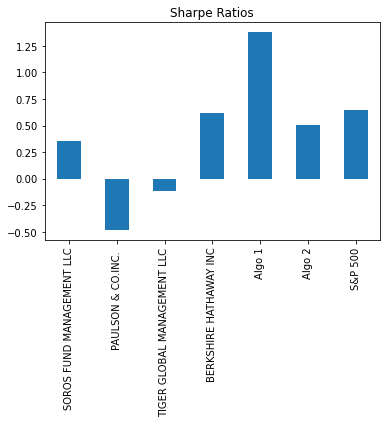

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpes.plot(kind = "bar", title = "Sharpe Ratios")

## On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

On the basis of the sharpe ratios, our first Algo strategy outperforms both the market and the whales by a substantial amount. Algo 2 though is roughly in line with Berkshire Hathaway and market performance, ranking slightly below the two. However, Algo 2 does outperform the other three whales

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Read in Fiserv Stock
fisv_csv = Path("Resources/fisv_historical.csv")
fisv_df = pd.read_csv(fisv_csv)
fisv_df.set_index(pd.to_datetime(fisv_df['Date'], infer_datetime_format = True), inplace = True)
fisv_df.drop(columns = ['Date'], inplace = True)
fisv_df.sort_index(inplace = True)
fisv_df.index = fisv_df.index.date
fisv_df["Symbol"] = "FISV"
fisv_df.head()

,Close,Symbol
2018-05-11,72.79,FISV
2018-05-14,72.42,FISV
2018-05-15,72.09,FISV
2018-05-16,72.28,FISV
2018-05-17,72.50,FISV


In [28]:
# Read the PayPal Stock
pypl_csv = Path("Resources/pypl_historical.csv")
pypl_df = pd.read_csv(pypl_csv)
pypl_df.set_index(pd.to_datetime(pypl_df['Date'], infer_datetime_format = True), inplace = True)
pypl_df.drop(columns = ['Date'], inplace = True)
pypl_df.sort_index(inplace = True)
pypl_df.index = pypl_df.index.date
pypl_df["Symbol"] = "PYPL"
pypl_df.head()

,Close,Symbol
2018-05-11,79.20,PYPL
2018-05-14,78.81,PYPL
2018-05-15,77.79,PYPL
2018-05-16,77.82,PYPL
2018-05-17,79.19,PYPL


In [29]:
# Read the Twitter Stock
twtr_csv = Path("Resources/twtr_historical.csv")
twtr_df = pd.read_csv(twtr_csv)
twtr_df.set_index(pd.to_datetime(twtr_df['Date'], infer_datetime_format = True), inplace = True)
twtr_df.drop(columns = ['Date'], inplace = True)
twtr_df.sort_index(inplace = True)
twtr_df.index = twtr_df.index.date
twtr_df["Symbol"] = "TWTR"
twtr_df.head()

,Close,Symbol
2018-05-11,32.75,TWTR
2018-05-14,33.39,TWTR
2018-05-15,32.75,TWTR
2018-05-16,32.77,TWTR
2018-05-17,32.58,TWTR


In [30]:
# Concatenate all stocks into a single DataFrame
custom_df = pd.concat([fisv_df, pypl_df, twtr_df], axis = "rows", join = "inner")
custom_df.head()

,Close,Symbol
2018-05-11,72.79,FISV
2018-05-14,72.42,FISV
2018-05-15,72.09,FISV
2018-05-16,72.28,FISV
2018-05-17,72.50,FISV


In [31]:
# Reset the index
custom_df.reset_index(inplace = True)
custom_df.rename(columns = {"index":"Date"}, inplace = True)
custom_df.head()

,Date,Close,Symbol
0,2018-05-11,72.79,FISV
1,2018-05-14,72.42,FISV
2,2018-05-15,72.09,FISV
3,2018-05-16,72.28,FISV
4,2018-05-17,72.50,FISV


In [32]:
# Pivot so that each column of prices represents a unique symbol
custom_pivot = custom_df.pivot_table(values = "Close", index = "Date", columns = ["Symbol"])
custom_pivot.head()

Symbol,FISV,PYPL,TWTR
Date,,,
2018-05-11,72.79,79.20,32.75
2018-05-14,72.42,78.81,33.39
2018-05-15,72.09,77.79,32.75
2018-05-16,72.28,77.82,32.77
2018-05-17,72.50,79.19,32.58


In [33]:
# Calculate Percent Change and Drop Nulls
custom_returns = custom_pivot.pct_change().dropna()
custom_returns.head()

Symbol,FISV,PYPL,TWTR
Date,,,
2018-05-14,-0.005083,-0.004924,0.019542
2018-05-15,-0.004557,-0.012943,-0.019167
2018-05-16,0.002636,0.000386,0.000611
2018-05-17,0.003044,0.017605,-0.005798
2018-05-18,0.006621,0.020205,0.001535


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
custom_tot_returns = custom_returns.dot(weights)
custom_tot_returns.head()

Date
2018-05-14    0.003178
2018-05-15   -0.012222
2018-05-16    0.001211
2018-05-17    0.004950
2018-05-18    0.009453
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
combo_df2 = pd.concat([combo_df,custom_tot_returns], axis = "columns", join = "inner")
combo_df2.rename(columns = {0: "Custom"}, inplace = True)
combo_df2.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.003178
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.012222
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.001211
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,0.004950
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,0.009453


In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combo_df2.dropna(inplace = True)
combo_df2.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.003178
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.012222
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.001211
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,0.004950
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,0.009453


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [37]:
# Risk -- Calculating Annualized standard deviation
combo_std2 = combo_df2.std()
combo_std_yr2 = combo_std2*np.sqrt(252)
combo_std_yr2

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
Custom                         0.297367
dtype: float64

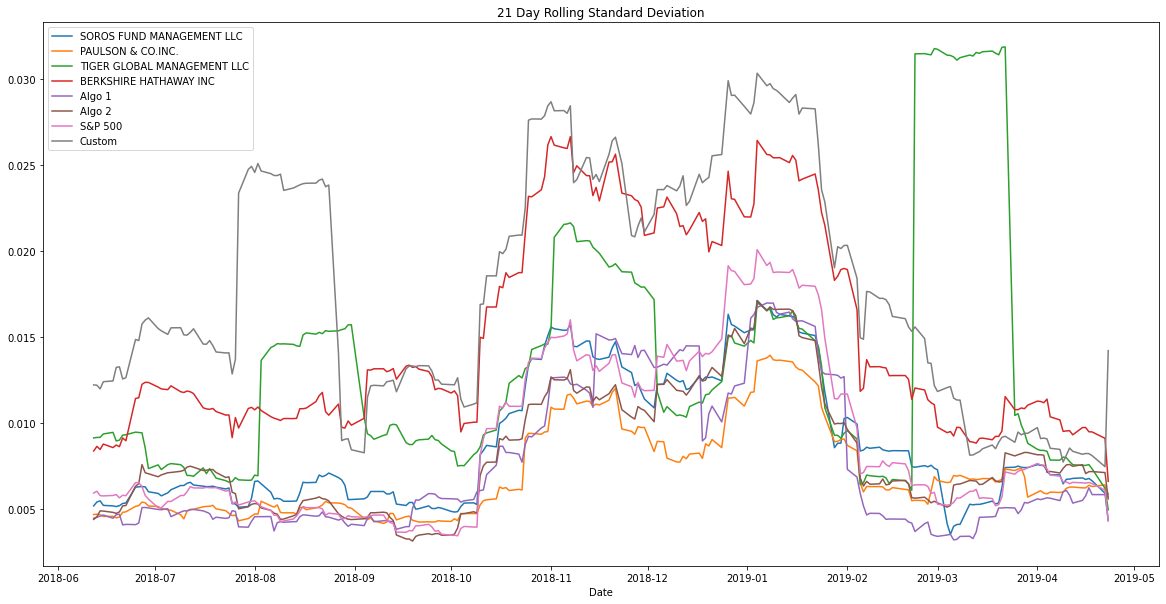

In [38]:
# Rolling
combo_rolling_std_ax2 = combo_df2.rolling(window = 21).std().plot(figsize = (20,10), title = "21 Day Rolling Standard Deviation")
combo_rolling_std_ax2.legend(loc = "upper left")

In [39]:
# Annualized Sharpe Ratios
sharpes2 = (combo_df2.mean()*252)/(combo_df2.std()*np.sqrt(252))
sharpes2

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
Custom                         1.049191
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

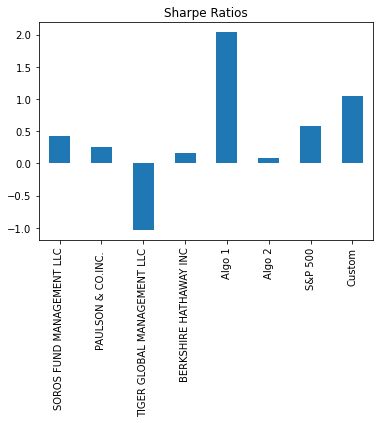

In [40]:
# Visualize the sharpe ratios as a bar plot
sharpes2.plot(kind = "bar", title = "Sharpe Ratios")

In [41]:
# Create a correlation analysis
combo_corr2 = combo_df2.corr()
combo_corr2

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.673227
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.533720
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.301292
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.814455
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.221483
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.683134
S&P 500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.754471
Custom,0.673227,0.533720,0.301292,0.814455,0.221483,0.683134,0.754471,1.000000


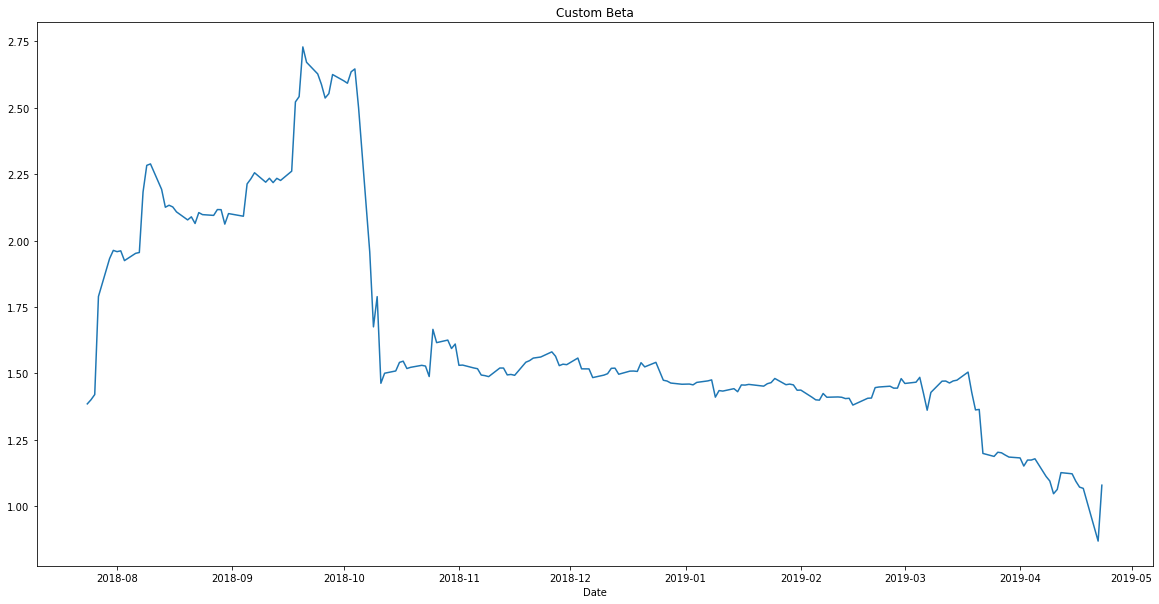

In [42]:
# Beta
beta_portfolio = "Custom"
span = 50
covar2 = combo_df2[beta_portfolio].rolling(window = span).cov(combo_df2["S&P 500"])
var2 = combo_df2["S&P 500"].rolling(window = span).var()
beta2 = covar2/var2
beta_title = beta_portfolio + " Beta"
beta_ax2 = beta2.plot(figsize = (20,10), title = beta_title)

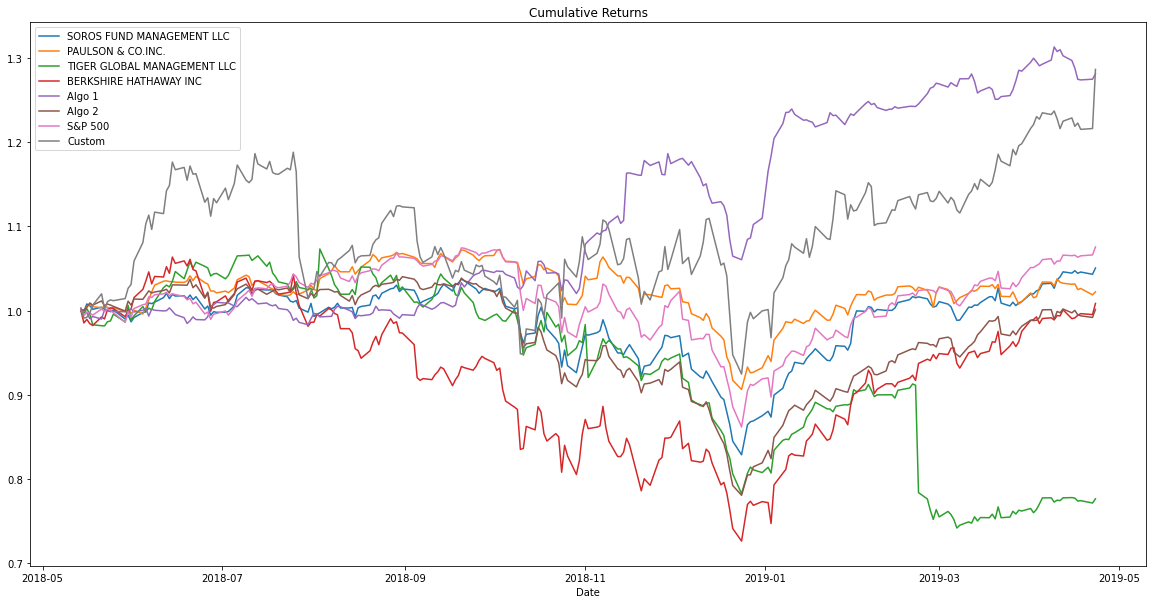

In [43]:
# Plot cumulative returns
combo_cumulative_returns2 = (1+combo_df2).cumprod()
combo_cum_ax2 = combo_cumulative_returns2.plot(figsize = (20,10), title = "Cumulative Returns")
combo_cum_ax2.legend(loc = "upper left")